# SIR Model


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
from networkx.generators.random_graphs import (
    connected_watts_strogatz_graph, erdos_renyi_graph
)

In [2]:
N = 400
proba_contact = 0.5
graph = erdos_renyi_graph(n=N, p=0.02)
layout = nx.random_layout(graph)
print(nx.info(graph))

Name: 
Type: Graph
Number of nodes: 400
Number of edges: 1555
Average degree:   7.7750


expected number of contacts 3.9
Generating transmissions
Running simulation
t = 0 / 100


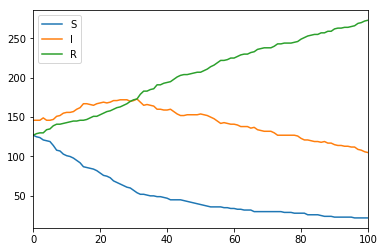

In [3]:
from sir_model import ProximityModel, NetworkModel, indicator
from test_model import generate_scatterplot

initial_states = np.random.randint(3, size=N)
model =  NetworkModel(
    graph=graph, mu=0.01, lamb=0.02, proba_contact=proba_contact, 
    layout=layout, initial_states=initial_states
)
print("expected number of contacts %.1f" % model.n_contacts)
model.run(100, print_every=200)
model.get_counts().plot();

# Check inference

n = 0 / 500
n = 100 / 500
n = 200 / 500
n = 300 / 500
n = 400 / 500
run times from 2.7e-03s to 7.0e-03s median 2.7e-03s


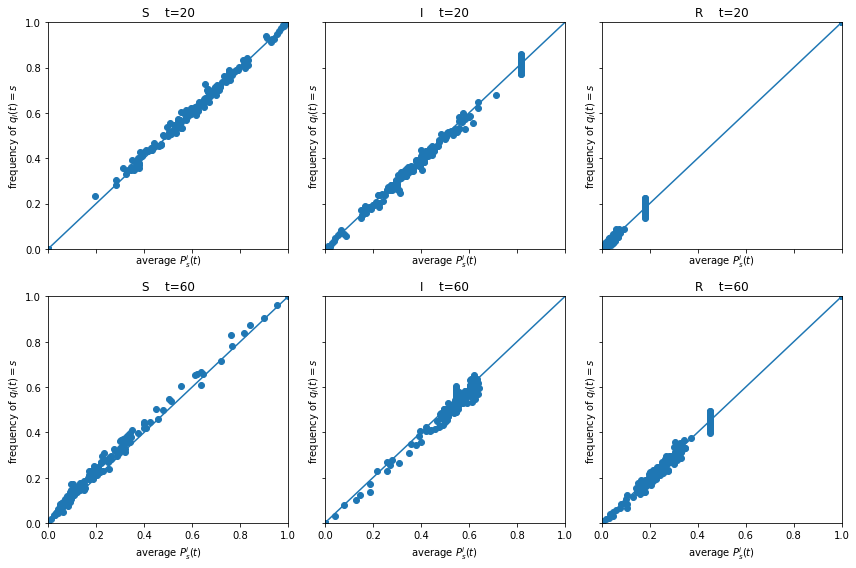

In [4]:
from inference_model import MeanField
initial_probas = indicator(model.initial_states)
infer = MeanField(initial_probas, model.x_pos, model.y_pos)
generate_scatterplot(model, infer, 500, [20, 60])

n = 0 / 500
n = 100 / 500
n = 200 / 500
n = 300 / 500
n = 400 / 500
run times from 3.3e-01s to 1.5e+00s median 3.6e-01s


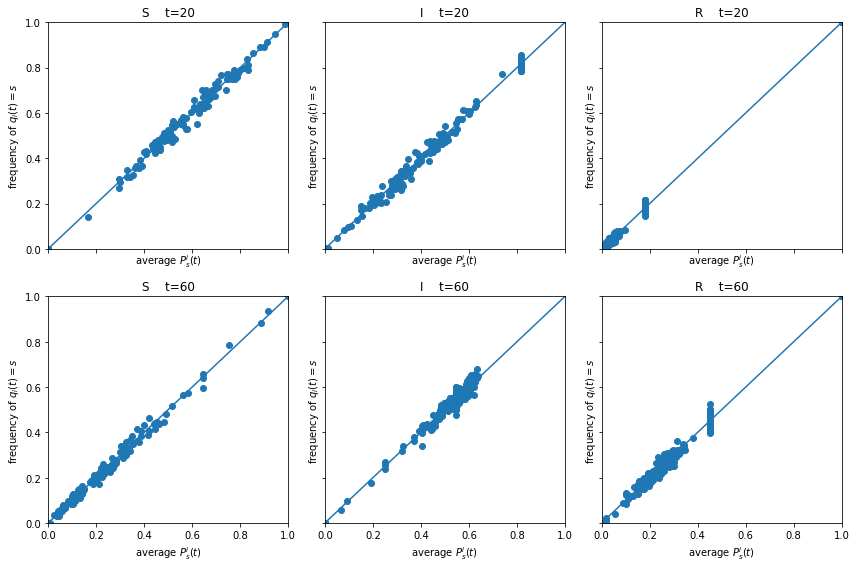

In [5]:
from inference_model import DynamicMessagePassing
initial_probas = indicator(model.initial_states)
infer = DynamicMessagePassing(initial_probas, model.x_pos, model.y_pos)
generate_scatterplot(model, infer, 500, [20, 60])